In [1]:
import mlatom as ml

In [2]:
# get initial structure
h2 = ml.molecule.from_xyz_string('''2

H 0 0 0
H 0 0 0.7
''')

In [3]:
# define the reference method
dft = ml.models.methods(method='B3LYP/6-31G*')

In [8]:
# optimize geometry and calculate frequency
optmol = ml.optimize_geometry(
    model=dft,
    initial_molecule=h2
    ).optimized_molecule
freq = ml.freq(model=dft,
molecule=optmol)

In [9]:
# settings for sampling points during AL loop
sampler_kwargs = {
    'initcond_sampler':'wigner',
    'initcond_sampler_kwargs':{
        'molecule':optmol,
        'number_of_initial_conditions':100,
        'initial_temperature':300},
    'maximum_propagation_time':100.0,
    'time_step':0.5,
    'uq_threshold':0.000001,
}

 Initial points sampling: Use cross validation
 Initial points sampling: Number of CV splits = 5
Start initial points sampling...
 Initial points sampling: initial points RMSE threshold not found, fit learning curve instead
 Initial points sampling: Train on energies only
Training the main auxiliary model
Optimized hyperparameters for energy aux model: lambda=2.9103830456733704e-11, sigma=0.35355339059327373
Training the main auxiliary model
Optimized hyperparameters for energy aux model: lambda=2.9103830456733704e-11, sigma=1.189207115002721
Training the main auxiliary model
Optimized hyperparameters for energy aux model: lambda=2.9103830456733704e-11, sigma=0.35355339059327373
Training the main auxiliary model
Optimized hyperparameters for energy aux model: lambda=2.9103830456733704e-11, sigma=1.189207115002721
Training the main auxiliary model
Optimized hyperparameters for energy aux model: lambda=2.9103830456733704e-11, sigma=0.35355339059327373
    Number of points: 50
    eRMSE =

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

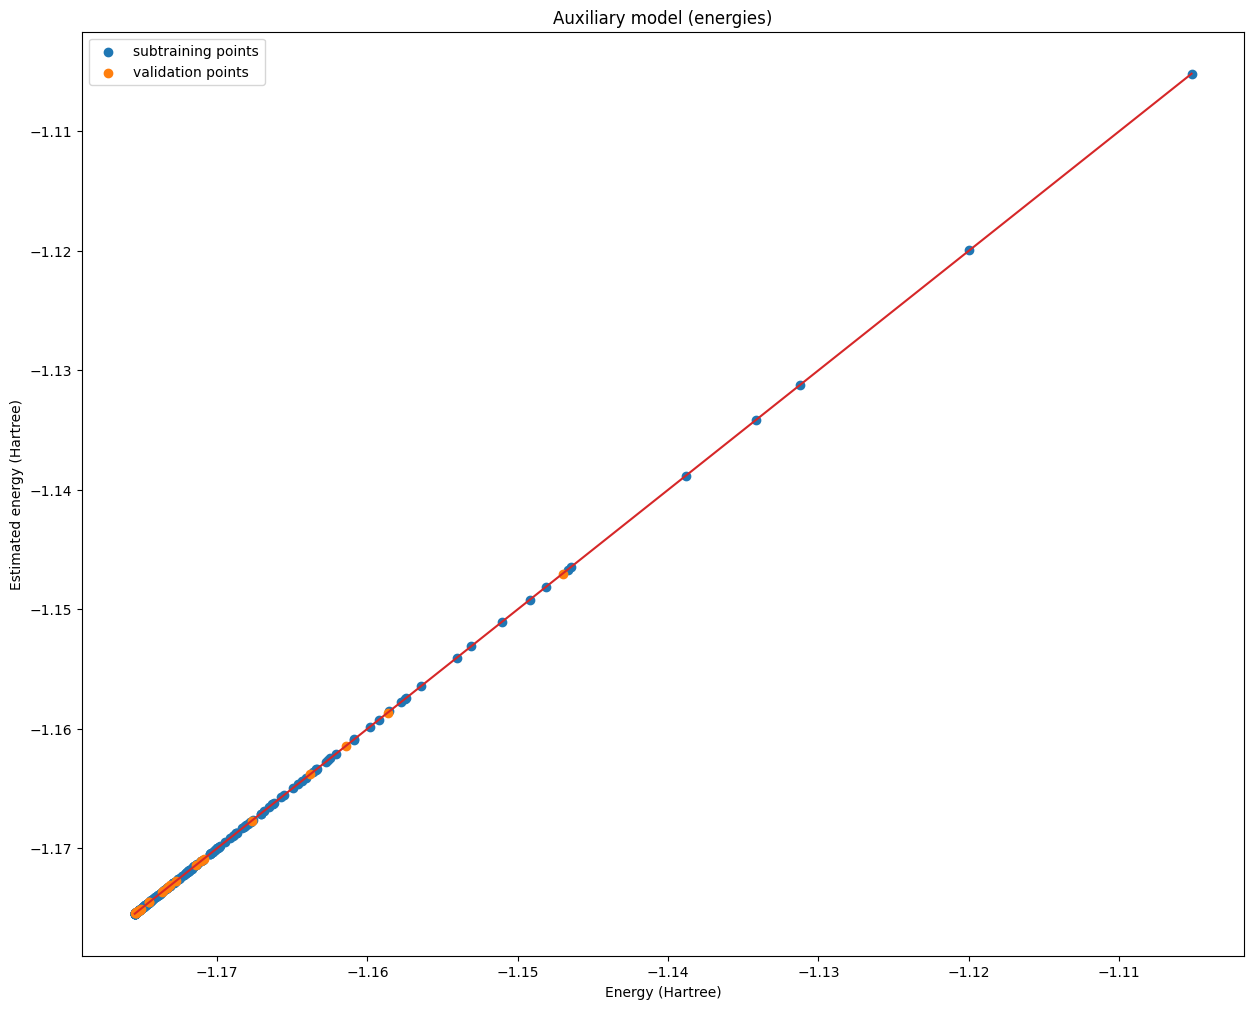

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

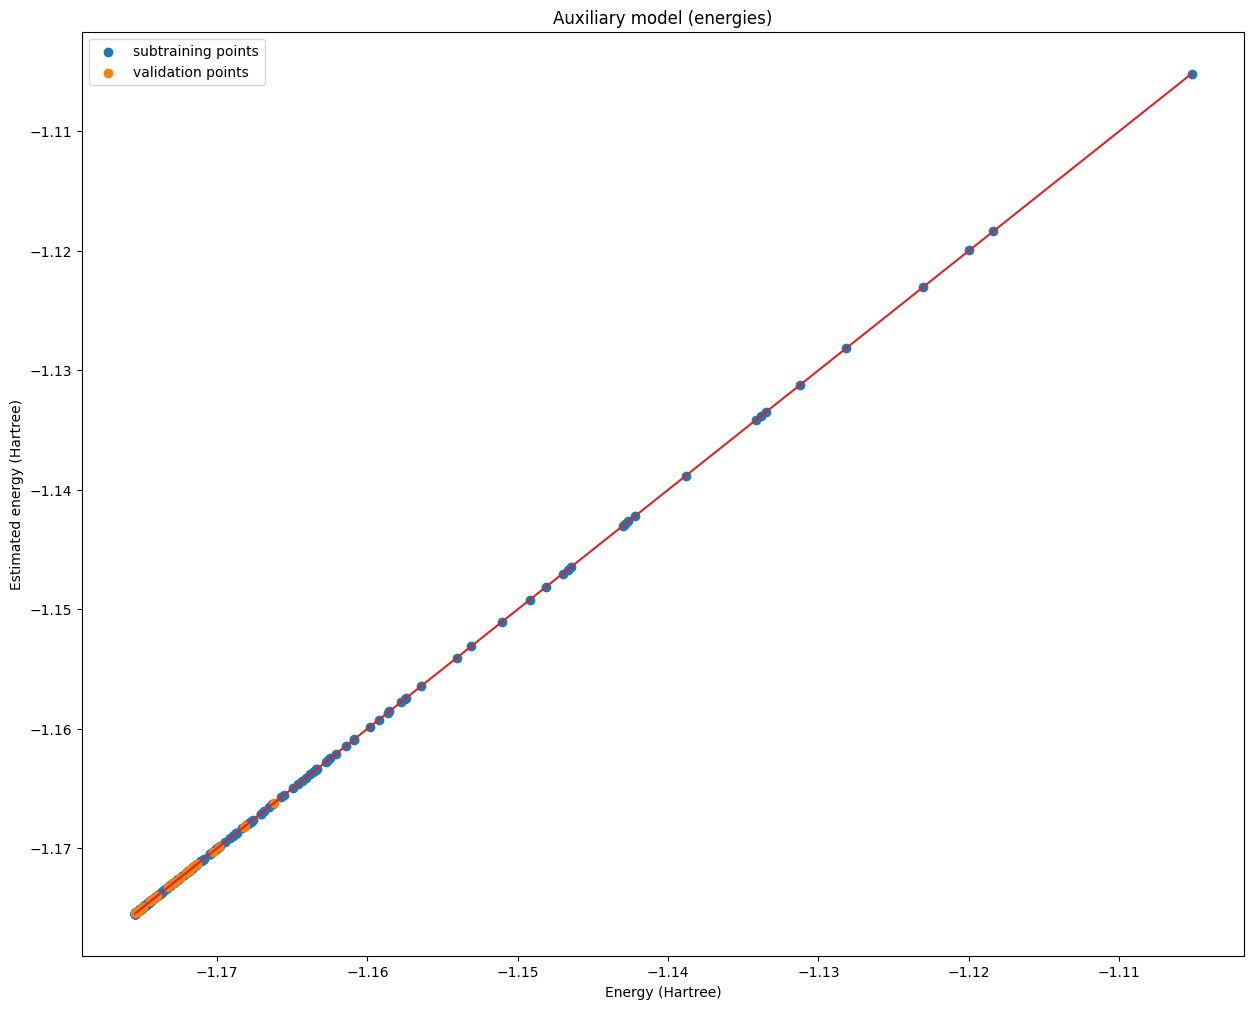

In [10]:
# start active learning
ml.al(molecule=optmol,
      ml_model='KREG',
      sampler = 'md',
      sampler_kwargs=sampler_kwargs,
      min_new_points=5,
      reference_method=dft)

In [14]:
# check the final labeled database
db = ml.molecular_database.load(filename='labeled_db.json', format='json')
len(db)

260

In [15]:
for imol in range(len(db)):
    print(db[imol].internuclear_distance(0, 1), db[imol].energy)

0.7823451697683274 -1.174510951514872
0.7221471501198621 -1.1751814536298157
0.773584366503031 -1.1748827202231804
0.7216210793601493 -1.175165549518331
0.7162636155127889 -1.17497891440757
0.6048495422188719 -1.1577669822719785
0.6300472269170322 -1.1643649048061762
0.8374985173708069 -1.1705034476629081
0.8941441624397706 -1.1640848209229615
0.7508323191319759 -1.1754394702474635
0.7442099182063621 -1.1754810491540266
0.6754850406335751 -1.1719264071766042
0.6687183965652043 -1.1711070431210335
0.7809421155386203 -1.1745759971226668
0.6040355144370532 -1.1575204746148502
0.7049977245151794 -1.1744343277757772
0.7775029902937978 -1.174726628810696
0.753220911245473 -1.1754105521193954
0.7081732116096636 -1.174609308700529
0.7105889119777743 -1.1747309919454192
0.6311322078803556 -1.164606695388334
0.6550040542866308 -1.169135132464214
0.6928905245821361 -1.173604459616726
0.6968664377330697 -1.173906111914999
0.7815306963878011 -1.1745489617809464
0.7466460703764294 -1.175472444278777

In [16]:
db.view()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.